In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn import datasets

In [23]:
digits = datasets.load_digits()


In [24]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [25]:
n_samples = len(digits.images)
features = digits.images.reshape((n_samples, -1))

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split( features, digits.target, test_size = 0.3,stratify = digits.target, random_state = 123 )

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
error_rate = []
for i in range(1,40) :
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != y_test))

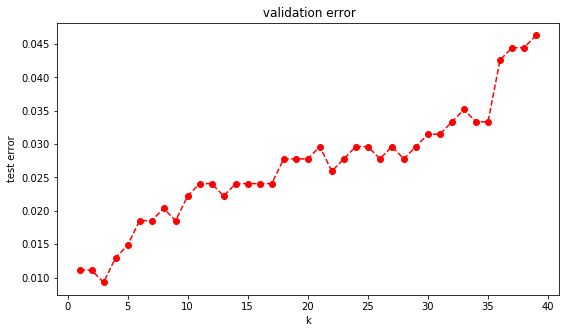

In [30]:
fig, ax = plt.subplots(figsize = (9,5)) 
ax.plot(range(1,40), error_rate, color = 'red', linestyle = '--' , marker = 'o' ) 
ax.set(xlabel = 'k', ylabel = 'test error', title = ' validation error') 
plt.show()

Hence, we chose knn =4

In [31]:
knn = KNeighborsClassifier(n_neighbors= 5)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
model = knn.fit(X_train, y_train)

In [34]:
y_pred = knn.predict(X_test)

In [35]:
print(accuracy_score(y_test, y_pred))

0.9851851851851852


In [37]:
print(confusion_matrix(y_test,y_pred))

[[54  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  1  0  0]
 [ 0  0  0 54  0  0  0  1  0  0]
 [ 0  0  0  0 53  0  0  1  0  0]
 [ 0  0  0  0  0 54  1  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  3  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  1  0  0  0 53]]


In [39]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      1.00      0.97        55
           2       1.00      0.98      0.99        53
           3       1.00      0.98      0.99        55
           4       1.00      0.98      0.99        54
           5       0.98      0.98      0.98        55
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       1.00      0.94      0.97        52
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

